In [135]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv('/Users/sebastian/Desktop/robotex2.csv')
df = df.set_index(['start_time'])
df.head()

,start_lat,start_lng,end_lat,end_lng,ride_value
start_time,,,,,
2022-03-01 00:00:00.133110000,59.436431,24.556602,59.438643,24.754031,2.74000
2022-03-01 00:00:01.112760000,59.402839,24.692944,59.437790,24.743403,1.19600
2022-03-01 00:00:01.780696000,59.407155,24.690181,59.523082,24.820903,3.69300
2022-03-01 00:00:01.821318000,59.405499,24.722777,59.442098,24.764780,1.17075
2022-03-01 00:00:01.881445000,59.442498,24.740105,59.451593,24.738421,0.25325


In [137]:
df_0 = df.loc['2022-03-01 00:00:00*':'2022-03-01 01:00:00*']
df_1 = df.loc['2022-03-01 01:00:00*':'2022-03-01 02:00:00*']
df_8 = df.loc['2022-03-01 08:00:00*':'2022-03-01 09:00:00*']

In [138]:
coords_0 = df_0.as_matrix(columns=['start_lat', 'start_lng'])
coords_1 = df_1.as_matrix(columns=['start_lat', 'start_lng'])
coords_8 = df_8.as_matrix(columns=['start_lat', 'start_lng'])

/Users/sebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/sebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/sebastian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [139]:
kms_per_radian = 6371.0088
epsilon = .4 / kms_per_radian

In [140]:
db_0 = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords_0))
db_1 = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords_1))
db_8 = DBSCAN(eps=epsilon, min_samples=10, algorithm='ball_tree', metric='haversine').fit(np.radians(coords_8))

In [141]:
cluster_labels_0 = db_0.labels_
cluster_labels_1 = db_1.labels_
cluster_labels_8 = db_8.labels_

In [142]:
num_clusters_0 = len(set(cluster_labels_0))
num_clusters_1 = len(set(cluster_labels_1))
num_clusters_8 = len(set(cluster_labels_8))

In [143]:
clusters_0 = pd.Series([coords_0[cluster_labels_0 == n] for n in range(num_clusters_0)])
clusters_1 = pd.Series([coords_1[cluster_labels_1 == n] for n in range(num_clusters_1)])
clusters_8 = pd.Series([coords_8[cluster_labels_8 == n] for n in range(num_clusters_8)])

In [144]:
print('Number of clusters: {}'.format(num_clusters_0))
print('Number of clusters: {}'.format(num_clusters_1))
print('Number of clusters: {}'.format(num_clusters_8))

Number of clusters: 19
Number of clusters: 20
Number of clusters: 20


In [155]:
a = (clusters_0[0][:,0])
b = (clusters_0[0][:,1])
c = (clusters_1[0][:,0])
d = (clusters_1[0][:,1])
e = (clusters_8[0][:,0])
f = (clusters_8[0][:,1])

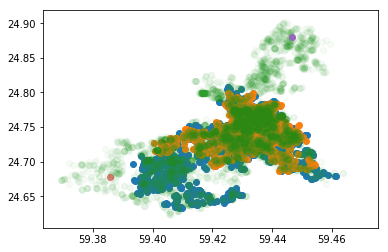

In [176]:
plt.scatter(a,b)
plt.scatter(c,d)
plt.scatter(e,f, alpha=0.04)
plt.scatter(z,y, alpha=0.5)
plt.scatter(w,x, alpha=1)

In [147]:
a = (clusters_0[0][:,0]).mean()
b = (clusters_0[0][:,1]).mean()
c = (clusters_1[0][:,0]).mean()
d = (clusters_1[0][:,1]).mean()
e = (clusters_8[0][:,0]).mean()
f = (clusters_8[0][:,1]).mean()

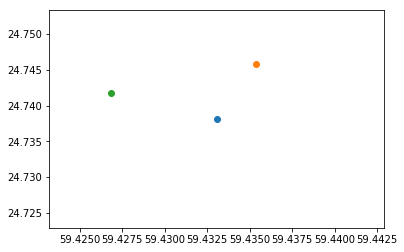

In [148]:
plt.scatter(a,b)
plt.scatter(c,d)
plt.scatter(e,f)

In [149]:
print(clusters_0)

0     [[59.40283923972711, 24.69294409437466], [59.4...
1     [[59.38607300448272, 24.69213111088469], [59.3...
2     [[59.4418514118956, 24.87454753873742], [59.44...
3     [[59.44129408897275, 24.841235606407828], [59....
4     [[59.416679703502595, 24.79902331333763], [59....
5     [[59.400669500445424, 24.648455286420997], [59...
6     [[59.426779107190846, 24.622475130586782], [59...
7     [[59.50769680753433, 24.82983117359132], [59.5...
8     [[59.37344916346678, 24.71240901956801], [59.3...
9     [[59.41662857130694, 24.88650733117569], [59.4...
10    [[59.498390585831025, 24.828926123410948], [59...
11    [[59.45100844443674, 24.83673559871785], [59.4...
12    [[59.5074072415699, 24.85107540593912], [59.50...
13    [[59.42700853434451, 24.634547190848583], [59....
14    [[59.400247327732295, 24.71932810022236], [59....
15    [[59.38737912206393, 24.661052915476944], [59....
16    [[59.37766137846054, 24.666538318936357], [59....
17    [[59.367750945499274, 24.645455361272173],

In [150]:
z = clusters_0[1][:,0].mean()

In [151]:
y = clusters_0[1][:,1].mean()

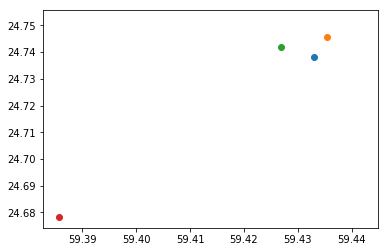

In [153]:
plt.scatter(a,b)
plt.scatter(c,d)
plt.scatter(e,f)
plt.scatter(z,y)

In [169]:
w = clusters_0[2][:,0].mean()
x = clusters_0[2][:,1].mean()

In [170]:
print(w)

59.44680799360248


In [171]:
print(x)

24.88034304144294
